In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib as mpl

# Force figure and saved figure backgrounds to white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'


In [33]:
results_df = pd.read_csv('Data/cs_aarhus/cs_analysis_results.csv')

In [16]:
results_df

,idx,layer,model,estimand,mean,median,true,bias,std,RMSE,RMSE_rel,MAE,MAPE,q025,q975,covering,mean_ind_cover,w_dist
0,0,lunch,true_net,stoch,2.16009,2.04099,2.16266,-0.00256,0.06641,0.06646,0.03073,0.01999,0.00989,2.027474,2.289190,True,1.00000,0.696732
1,0,lunch,agg_or,stoch,1.62856,1.54822,2.16266,-0.53410,0.21224,0.57473,0.26575,0.57463,0.24710,1.190480,2.039823,False,0.37705,3.894476
2,0,lunch,agg_and,stoch,1.15344,1.14076,2.16266,-1.00922,0.10130,1.01429,0.46900,1.00922,0.43788,0.956177,1.355036,False,0.03279,3.447402
3,0,lunch,MWG,stoch,2.26572,2.16885,2.16266,0.10306,0.16740,0.19658,0.09090,0.27585,0.13381,1.932474,2.577153,True,0.88525,1.404654
4,1,lunch,true_net,stoch,2.09497,1.98035,2.17059,-0.07562,0.09755,0.12343,0.05687,0.07573,0.03229,1.900325,2.284522,True,1.00000,0.652452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,298,work,MWG,stoch,2.70289,2.65972,2.58184,0.12105,0.26550,0.29179,0.11302,0.56833,0.24477,2.193898,3.229415,True,0.81967,2.428019
4796,299,work,true_net,stoch,2.58053,2.27942,2.55533,0.02519,0.06813,0.07263,0.02842,0.02567,0.01242,2.444950,2.712926,True,1.00000,0.575250
4797,299,work,agg_or,stoch,1.53692,1.47791,2.55533,-1.01842,0.26798,1.05308,0.41211,1.01842,0.34533,1.009174,2.047056,False,0.32787,4.145850
4798,299,work,agg_and,stoch,1.19665,1.19360,2.55533,-1.35869,0.14811,1.36674,0.53486,1.35885,0.47780,0.909007,1.477650,False,0.01639,6.084506


In [34]:
model_rename = {
    "true_net": "True",
    "MWG": "BG",
    "agg_or": "OR",
    "agg_and": "AND",
}

results_df["model"] = results_df["model"].replace(model_rename)
results_df["model"] = pd.Categorical(results_df["model"], categories=model_rename.values(), ordered=True)


layer_rename = {
    "facebook": "Facebook",
    "leisure": "Leisure",
    "lunch": "Lunch",
    "work": "Work",
}

results_df["layer"] = results_df["layer"].replace(layer_rename)
results_df["layer"] = pd.Categorical(results_df["layer"], categories=layer_rename.values(), ordered=True)


summary_df = (
    results_df
    .groupby(["layer", "model"])
    .agg(
        mean_RMSE_rel=("RMSE_rel", "mean"),
        mean_RMSE_rel_std=("RMSE_rel", "std"),
        rmse_rel_q5=("RMSE_rel", lambda x: np.percentile(x, 5)),
        rmse_rel_q95=("RMSE_rel", lambda x: np.percentile(x, 95)),

        mean_MAPE = ("MAPE", "mean"),
        median_MAPE = ("MAPE", "median"),
        mean_MAPE_std = ("MAPE", "std"),
        mape_q5 = ("MAPE", lambda x: np.percentile(x, 5)),
        mape_q95 = ("MAPE", lambda x: np.percentile(x, 95)),
       
       
        cover = ("covering", "mean"),
        ind_cover = ("mean_ind_cover", "mean"),

        w_dist = ("w_dist", "mean"),

        mean = ("mean", "mean"),
        median = ("median", "median"),
        std = ("std", "mean"),
        true = ("true", "mean"),
        true_std = ("true", "std"),

        mean_975 = ("q975", "mean"),
        mean_025 = ("q025", "mean"),

        bias = ("bias", "mean"),
        bias_std = ("bias", "std"),
        )
    .reset_index()
)

summary_df


C:\Users\bar21\AppData\Local\Temp\ipykernel_6728\1375891005.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,layer,model,mean_RMSE_rel,mean_RMSE_rel_std,rmse_rel_q5,rmse_rel_q95,mean_MAPE,median_MAPE,mean_MAPE_std,mape_q5,...,w_dist,mean,median,std,true,true_std,mean_975,mean_025,bias,bias_std
0,Facebook,True,0.050445,0.019392,0.030455,0.085025,0.032754,0.027965,0.021690,0.006839,...,0.773387,1.968457,1.530680,0.073805,1.973762,0.016250,2.112857,1.822987,-0.005305,0.075046
1,Facebook,BG,0.288783,0.111563,0.147309,0.501975,0.401927,0.370590,0.107885,0.279608,...,4.348995,2.216834,2.075505,0.390769,1.973762,0.016250,2.976111,1.502085,0.243073,0.385332
2,Facebook,OR,0.228015,0.089897,0.132250,0.397835,0.399898,0.373510,0.095735,0.294346,...,3.423786,2.088715,1.978455,0.301386,1.973762,0.016250,2.678067,1.494382,0.114953,0.357781
3,Facebook,AND,0.432572,0.096581,0.265149,0.591325,0.353564,0.327390,0.071224,0.282666,...,5.590872,1.140231,1.141150,0.175375,1.973762,0.016250,1.483799,0.795356,-0.833530,0.199180
4,Leisure,True,0.075181,0.029133,0.042480,0.131551,0.047956,0.040180,0.032731,0.009407,...,0.982684,1.507101,1.407155,0.081623,1.527920,0.010943,1.666789,1.346089,-0.020820,0.088195
5,Leisure,BG,0.194806,0.068208,0.108888,0.335627,0.167516,0.151605,0.051847,0.117828,...,2.872821,1.430527,1.363575,0.208788,1.527920,0.010943,1.851939,1.053284,-0.097393,0.207257
6,Leisure,OR,0.275692,0.123352,0.116778,0.495491,0.254189,0.212800,0.102721,0.159068,...,4.270131,1.228703,1.207640,0.197918,1.527920,0.010943,1.616663,0.839216,-0.299217,0.287248
7,Leisure,AND,0.248095,0.088977,0.106510,0.391898,0.229440,0.204340,0.070089,0.158329,...,4.204927,1.170395,1.175330,0.109779,1.527920,0.010943,1.385654,0.954375,-0.357524,0.148735
8,Lunch,True,0.053587,0.017886,0.032239,0.091787,0.031632,0.025630,0.022356,0.004755,...,0.725443,2.179829,2.073915,0.086144,2.186750,0.016807,2.348661,2.010204,-0.006921,0.086526
9,Lunch,BG,0.140703,0.059174,0.078672,0.252795,0.155999,0.145660,0.042441,0.113825,...,1.804456,2.032124,1.982005,0.192166,2.186750,0.016807,2.415408,1.676886,-0.154626,0.220918


c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\scales\scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.
c:\Users\bar21\.conda\envs\STAT\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


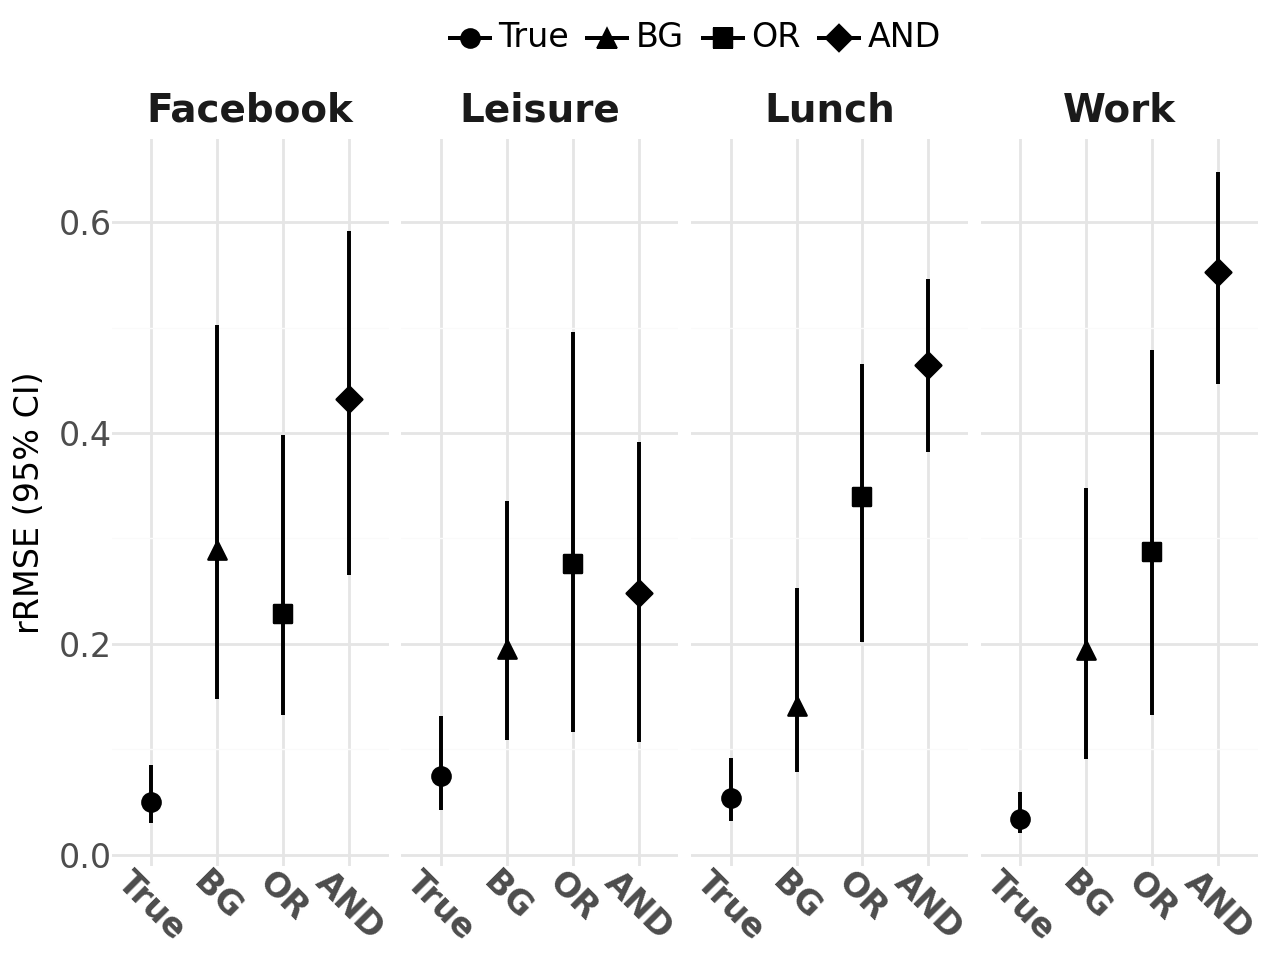

In [38]:

plot = (
    p9.ggplot(summary_df, p9.aes(x="model", 
                                 y="mean_RMSE_rel", 
                                #  y="mean_MAPE", 
                                 group="model", 
                                #  color="model",
                                 shape="model"
                                 ))
    + p9.geom_line(position=p9.position_dodge(width=0.2), size=1.2)  
    + p9.geom_pointrange(
        p9.aes(ymin="rmse_rel_q5", ymax="rmse_rel_q95"),
        # p9.aes(ymin="mape_q5", ymax="mape_q95"),
        position=p9.position_dodge(width=0.2),
        size=0.8  
    )
    # + p9.theme_bw()
    + p9.theme_minimal()
    # + p9.theme_tufte()
    # + p9.scale_y_continuous(breaks=np.arange(0, 1.2, 0.2), limits=[0, 1])
    + p9.facet_wrap("layer", scales="fixed", ncol=4)

    + p9.labs(y="rRMSE (95% CI)", x="", color="", shape="")
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())

    # + p9.scale_color_discrete(name="")
    # + p9.scale_color_manual(values=custom_palette)
    + p9.theme(
        legend_title=p9.element_text(size=14, weight='bold'),
        legend_text=p9.element_text(size=12),
        axis_title_x=p9.element_text(size=12, ),
        axis_title_y=p9.element_text(size=12,),
        axis_text_x=p9.element_text(size=12, face="bold", angle=-45),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=14, weight='bold'), 
        legend_position="top", 
    )
)

plot.show()

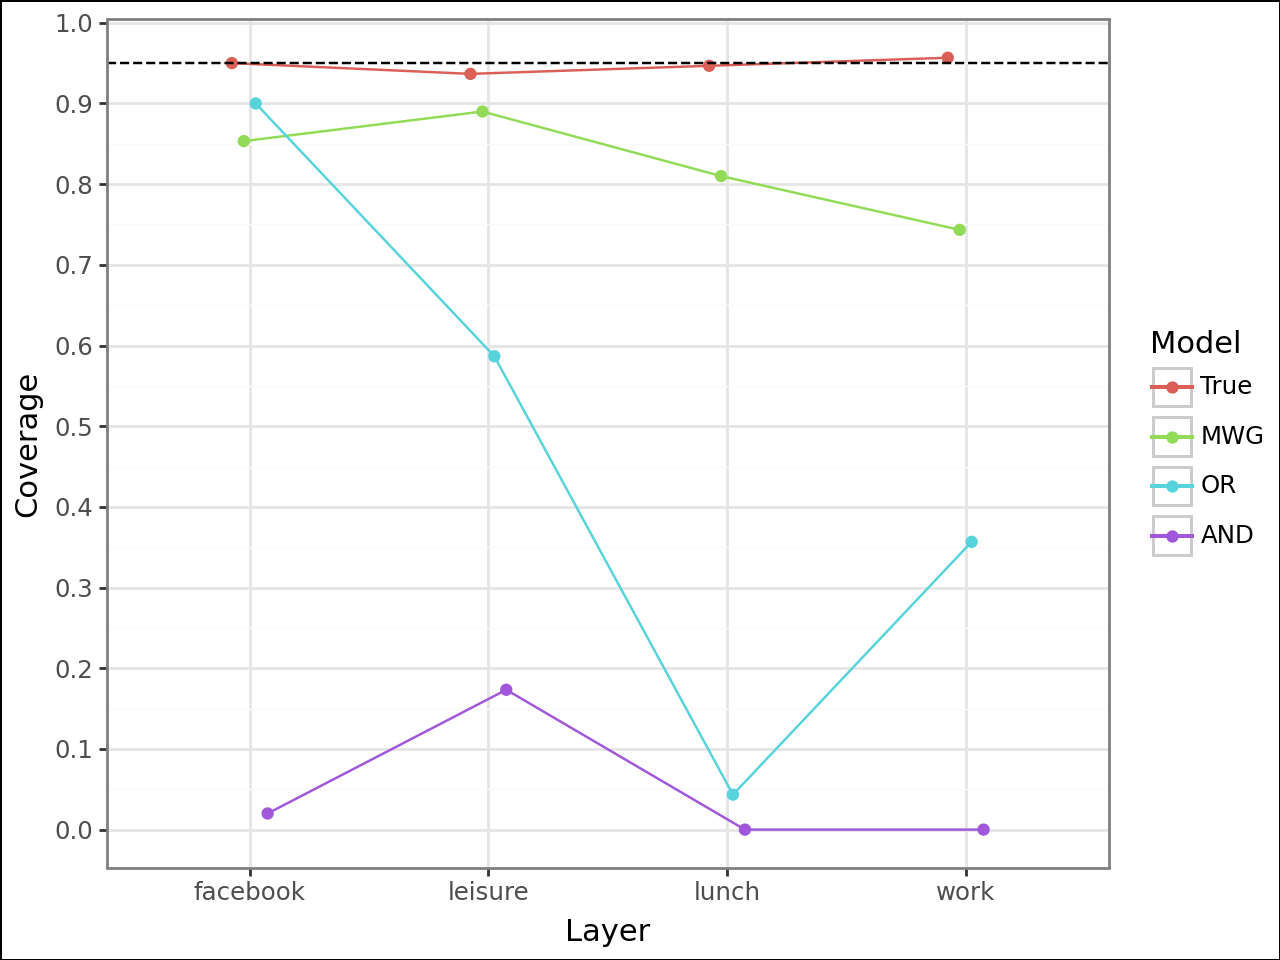

In [7]:
(
    p9.ggplot(summary_df, p9.aes(x="layer", 
                                y="cover", 
                                # y="ind_cover", 
                                group="model",
                                color="model"))
    + p9.geom_line(position=p9.position_dodge(width=0.2))
    + p9.geom_point(position=p9.position_dodge(width=0.2))
    + p9.geom_hline(yintercept=0.95, linetype="dashed")
    + p9.theme_bw()
    # + p9.facet_wrap("estimand", scales="fixed")
    # + p9.facet_wrap("estimand", scales="free_y")
    + p9.labs(y="Coverage", x="Layer")
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())
    + p9.scale_y_continuous(breaks=np.arange(0, 1.1, 0.1))
    + p9.scale_color_discrete(name="Model")
)


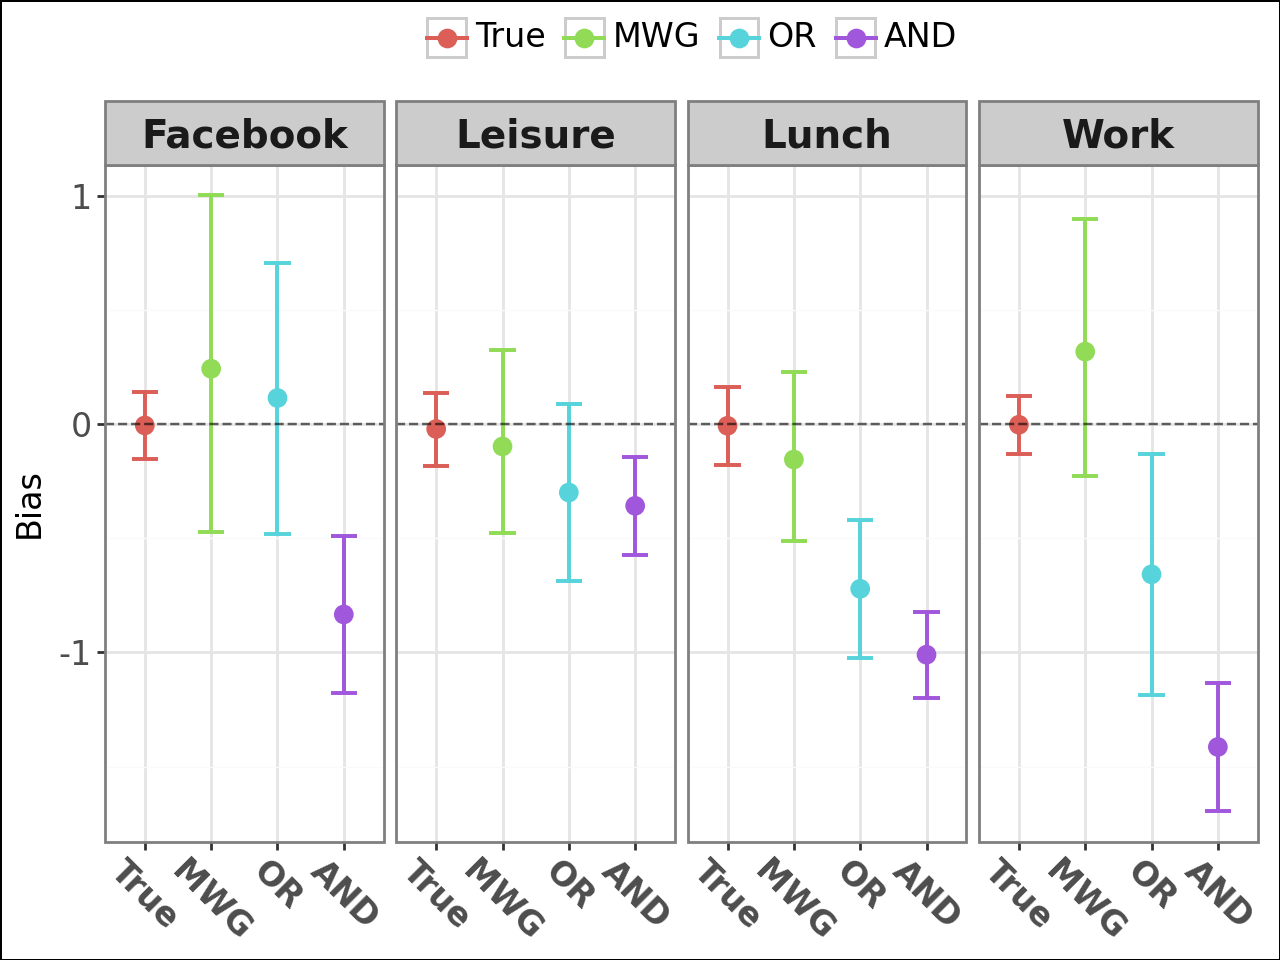

In [32]:



summary_df["bias_q975"] = summary_df["mean_975"] - summary_df["true"]
summary_df["bias_q025"] = summary_df["mean_025"] - summary_df["true"]

summary_df["bias_perc"] = summary_df["bias"] / summary_df["true"]

summary_df["bias_perc_q975"] = summary_df["bias_q975"] / summary_df["true"]
summary_df["bias_perc_q025"] = summary_df["bias_q025"] / summary_df["true"]


(
    # p9.ggplot(summary_df[summary_df["model"] != "true_net"], 
    p9.ggplot(summary_df, 
                        p9.aes(x="model", 
                                y="bias", 
                                # y="bias_perc", 
                                group="model",
                                color="model"))
    # + p9.geom_line(size=1)
    # + p9.geom_ribbon(p9.aes(ymin="bias_q025", ymax="bias_q975"),
                          #  alpha=0.4,
                        #  outline_type = "none")
    + p9.geom_errorbar(
        p9.aes(ymin="bias_q025", ymax="bias_q975"),
        # p9.aes(ymin="bias_perc_q025", ymax="bias_perc_q975"),
        position=p9.position_dodge(width=0.7),
        size=0.8, width=0.4  
    )
    + p9.geom_point(size=3, 
                 position = p9.position_dodge(width=0.7))
    + p9.geom_hline(yintercept=0.0, linetype="dashed", color="black", alpha=0.6)
    + p9.theme_bw()
    + p9.facet_wrap("layer", scales="fixed", ncol=4)
    + p9.labs(y="Bias", x="", color="")
    # + p9.coord_flip()
    # + p9.scale_x_continuous(breaks=summary_df["gamma_noise"].unique())
    # + p9.scale_y_continuous(breaks=np.arange(-1.0, 0.2, 0.1))
    + p9.scale_color_discrete(name="")
    # + p9.scale_fill_discrete(name="Model")
    + p9.theme(
        legend_title=p9.element_text(size=14, weight='bold'),
        legend_text=p9.element_text(size=12),
        axis_title_x=p9.element_text(size=12,),
        axis_title_y=p9.element_text(size=12,),
        axis_text_x=p9.element_text(size=12, weight="bold", angle=-45),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=14, weight='bold'),  
        legend_position="top",
    )
)